## Observations and Insights 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_mice = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="left" )

# Display the data table for preview
combined_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_count = combined_mice["Mouse ID"].nunique()
mouse_count


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mice[combined_mice.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [137]:
# Optional: Get all the data for the duplicate mouse ID. 


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice =combined_mice.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False, inplace=False)
cleaned_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = cleaned_mice["Mouse ID"].nunique()
clean_mouse_count


249

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = cleaned_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = cleaned_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = cleaned_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = cleaned_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = cleaned_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
stats_summary = pd.DataFrame({
    "Mean" : mean,
    "Median" : median,
    "Variance" : variance,
    "Standard Deviation" : standard_deviation,
    "SEM" : SEM
})
stats_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_drugs = cleaned_mice.groupby('Drug Regimen')
second_stats_summary = grouped_drugs.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
second_stats_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

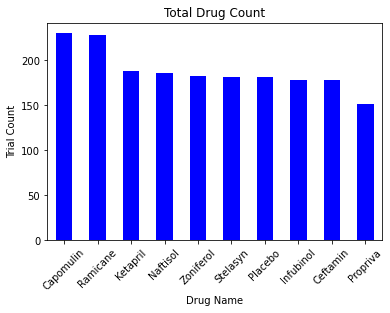

In [43]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_measure = cleaned_mice["Drug Regimen"].value_counts() 
y_axis = drug_regimen_measure.values
x_axis = drug_regimen_measure.index

drug_regimen_measure.plot(kind="bar", facecolor='blue')

plt.ylabel("Trial Count")
plt.xlabel("Drug Name")
plt.title("Total Drug Count")
plt.xticks(rotation=45)
plt.show()

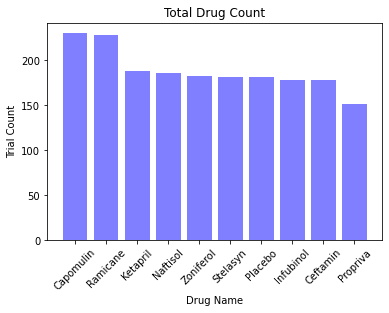

In [45]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# re-use axis values from earlier

# Tell matplotlib that we will be making a bar chart
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

# Give our chart some labels and a tile
plt.ylabel("Trial Count")
plt.xlabel("Drug Name")
plt.title("Total Drug Count")
plt.xticks(rotation=45)
plt.show()

In [59]:
# Split up our data into groups based upon 'gender'
sex_groups = cleaned_mice['Sex'].value_counts()
sex_groups


Male      958
Female    925
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Sex Comparison')

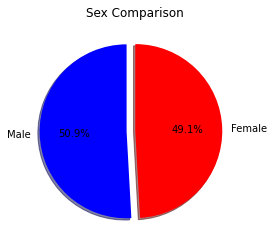

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = sex_groups.index
sizes = sex_groups.values
colors = ["blue", 'red']
explode = [0.1, 0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Sex Comparison")

Text(0.5, 1.0, 'Sex Comparison')

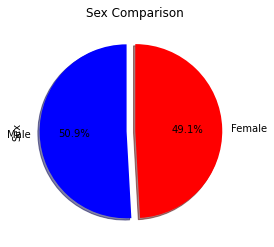

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#re-use variables from earlier
sex_groups.plot(kind="pie", explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Sex Comparison")

## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
best_drugs = cleaned_mice.loc[cleaned_mice['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
best_drugs_timepoint = best_drugs.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_drugs = pd.merge(best_drugs_timepoint,cleaned_mice, on=['Timepoint', 'Mouse ID'], how='inner')
merged_drugs

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a275,Ceftamin,Female,20,28,62.999356,3
3,45,a411,Ramicane,Male,3,22,38.407618,1
4,45,a444,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,45,y769,Ceftamin,Female,6,27,68.594745,4
96,45,y793,Capomulin,Male,17,17,31.896238,2
97,45,y865,Ceftamin,Male,23,26,64.729837,3
98,45,z578,Ramicane,Male,11,16,30.638696,0


In [96]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = [] 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_drugs['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin = merged_drugs.loc[merged_drugs['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']    
Ramicane = merged_drugs.loc[merged_drugs['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
Infubinol = merged_drugs.loc[merged_drugs['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
Ceftamin = merged_drugs.loc[merged_drugs['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']   
    
    # add subset 
tumor_vol_list = [Capomulin, Ramicane, Infubinol, Ceftamin]    
    
    # Determine outliers using upper and lower bounds
lower_outliers = lowerq - (1.5*iqr)
upper_outliers = upperq + (1.5*iqr)
print(f"Values below {lower_outliers} could be outliers.")
print(f"Values above {upper_outliers} could be outliers.")     

Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


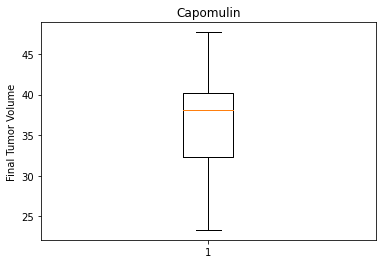

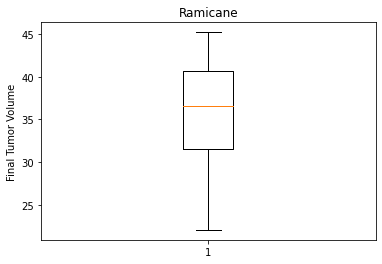

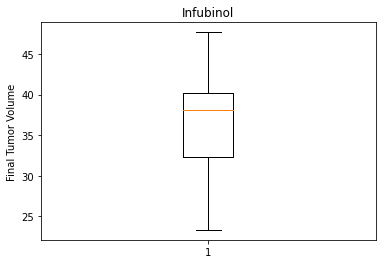

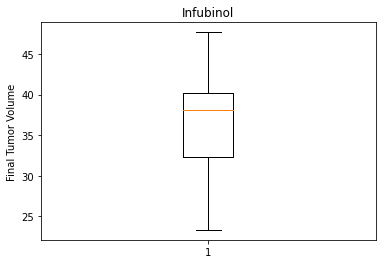

In [98]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(Capomulin)
plt.show()


fig2, ax1 = plt.subplots()
ax1.set_title('Ramicane')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(Ramicane)
plt.show()

fig3, ax1 = plt.subplots()
ax1.set_title('Infubinol')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(Capomulin)
plt.show()

fig4, ax1 = plt.subplots()
ax1.set_title('Infubinol')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(Capomulin)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
